### Amaç: iris çiçeğinin dört niteliğini kullanarak hangi türe ait olduğunu tahmin etmek.    
    
* sepal-length (alt yaprak uzunluğu cm)
* sepal-with (alt yaprak genişliği cm)
* pedal-length (üst yaprak genişliği cm)
* pedal-width (üst yaprak uzunluğu cm)

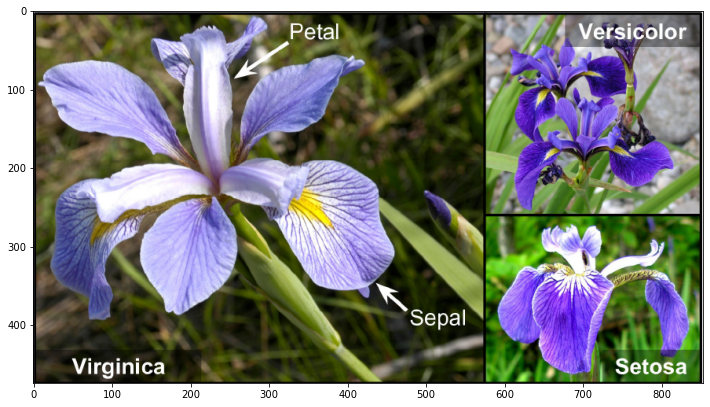

In [4]:
plt.figure(figsize=(12,12))
img=plt.imread('iris_flower.png')
plt.imshow(img)
plt.show();

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
df=pd.read_csv("Iris.csv")   

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
111,112,6.4,2.7,5.3,1.9,Iris-virginica
10,11,5.4,3.7,1.5,0.2,Iris-setosa
11,12,4.8,3.4,1.6,0.2,Iris-setosa
29,30,4.7,3.2,1.6,0.2,Iris-setosa


In [9]:
df.shape

(150, 6)

In [10]:
df.columns.tolist()

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [11]:
df.drop('Id', axis=1, inplace=True)

In [12]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [16]:
df.rename(columns={'SepalLengthCm': 'Sepal Length (cm)', 'SepalWidthCm': 'Sepal Width (cm)', 'PetalLengthCm': 'Petal Length (cm)', 'PetalWidthCm': 'Petal Width (cm)'}, inplace=True)

In [17]:
df

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
x=df[["Sepal Length (cm)",  "Sepal Width (cm)",  "Petal Length (cm)",  "Petal Width (cm)"]]

In [28]:
model=KMeans(n_clusters=5) 

In [29]:
model=model.fit(x) 

In [30]:
tahmin=model.predict(x)

In [31]:
silhouette_score(x,tahmin)

0.48851755088862725

In [32]:
clust=x.assign(Cluster=model.labels_)
model.cluster_centers_.astype('int')
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 4, 1, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 1,
       1, 4, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 1, 4, 1, 1, 1,
       4, 4, 4, 1, 4, 4, 4, 4, 4, 1, 4, 4, 2, 1, 3, 2, 2, 3, 4, 3, 2, 3,
       2, 2, 2, 1, 2, 2, 2, 3, 3, 1, 2, 1, 3, 1, 2, 3, 1, 1, 2, 3, 3, 3,
       2, 1, 1, 3, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [33]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust (clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters = no_of_cluster)
        model=model.fit(x)
        pred=model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score = silhouette_score(x,pred)
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)

Number of cluster 2,silhouette0.6808136202936815
Number of cluster 3,silhouette0.5525919445499755
Number of cluster 4,silhouette0.4978256901095468
Number of cluster 5,silhouette0.48851755088862725
Number of cluster 6,silhouette0.3682056968271304
Number of cluster 7,silhouette0.3587303344505876
Number of cluster 8,silhouette0.3553027216757645
Number of cluster 9,silhouette0.3144965040579778


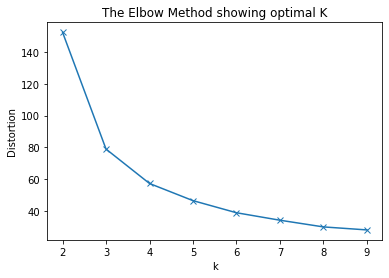

In [34]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show() #5 te kırılma olmuş, kırılma noktası, elbow metodu nerede kırılma varsa cluster yapıyoruz

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=11), k=(1, 12))

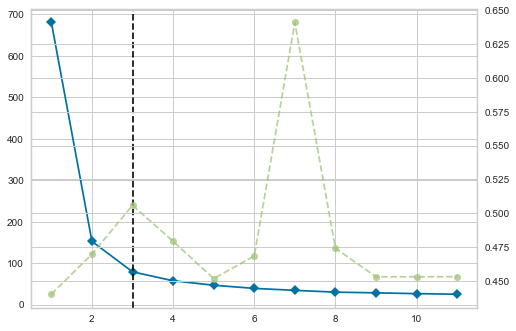

In [35]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(x)